In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import web_scraping as ws
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%config InlineBackend.figure_format = 'png'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

In [ ]:
is_genre_cols = ['is_Action', 'is_Adventure',
                 'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama',
                 'is_Family', 'is_Fantasy', 'is_History', 'is_Horror', 'is_Music',
                 'is_Musical', 'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi',
                 'is_Sport', 'is_Thriller', 'is_War', 'is_Western']

In [10]:
main_features = ['runtime_minutes', 'budget', 'years_since_release',
                 'imdb_user_rating', 'imdb_user_rating_count', 'oscar_wins',
                 'non_oscar_wins', 'metascore']

target = ['global_gross']

main_features_target = main_features + target

In [ ]:
# Put in feature_engineering module

def create_genre_encodings(df, unique_genres):
    for genre in unique_genres:
        df['is_' + genre] = df.apply(lambda x: genre in x['genres'], axis=1).astype(int)

In [4]:
with open('cleaned_usa_df.pickle', 'rb') as read_file:
    usa_df = pickle.load(read_file)

In [6]:
with open('cleaned_japan_df.pickle', 'rb') as read_file:
    japan_df = pickle.load(read_file)

In [11]:
usa_df[main_features_target].corr()
japan_df[main_features_target].corr()

,runtime_minutes,budget,years_since_release,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,global_gross
runtime_minutes,1.00,0.45,-0.17,0.23,0.33,0.19,0.34,0.06,0.45
budget,0.45,1.00,-0.24,0.27,0.49,0.19,0.36,0.11,0.72
years_since_release,-0.17,-0.24,1.00,0.29,0.08,0.17,-0.03,0.25,-0.10
imdb_user_rating,0.23,0.27,0.29,1.00,0.51,0.30,0.42,0.49,0.39
imdb_user_rating_count,0.33,0.49,0.08,0.51,1.00,0.57,0.72,0.48,0.71
oscar_wins,0.19,0.19,0.17,0.30,0.57,1.00,0.65,0.40,0.39
non_oscar_wins,0.34,0.36,-0.03,0.42,0.72,0.65,1.00,0.47,0.52
metascore,0.06,0.11,0.25,0.49,0.48,0.40,0.47,1.00,0.22
global_gross,0.45,0.72,-0.10,0.39,0.71,0.39,0.52,0.22,1.00


,runtime_minutes,budget,years_since_release,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,global_gross
runtime_minutes,1.00,0.09,-0.13,0.15,0.14,0.07,0.19,0.03,0.18
budget,0.09,1.00,0.04,-0.04,0.13,0.07,0.20,-0.01,0.21
years_since_release,-0.13,0.04,1.00,0.14,0.22,0.05,0.07,0.02,0.04
imdb_user_rating,0.15,-0.04,0.14,1.00,0.29,0.10,0.27,0.16,0.15
imdb_user_rating_count,0.14,0.13,0.22,0.29,1.00,0.66,0.77,0.32,0.62
oscar_wins,0.07,0.07,0.05,0.10,0.66,1.00,0.72,0.21,0.44
non_oscar_wins,0.19,0.20,0.07,0.27,0.77,0.72,1.00,0.29,0.62
metascore,0.03,-0.01,0.02,0.16,0.32,0.21,0.29,1.00,0.07
global_gross,0.18,0.21,0.04,0.15,0.62,0.44,0.62,0.07,1.00


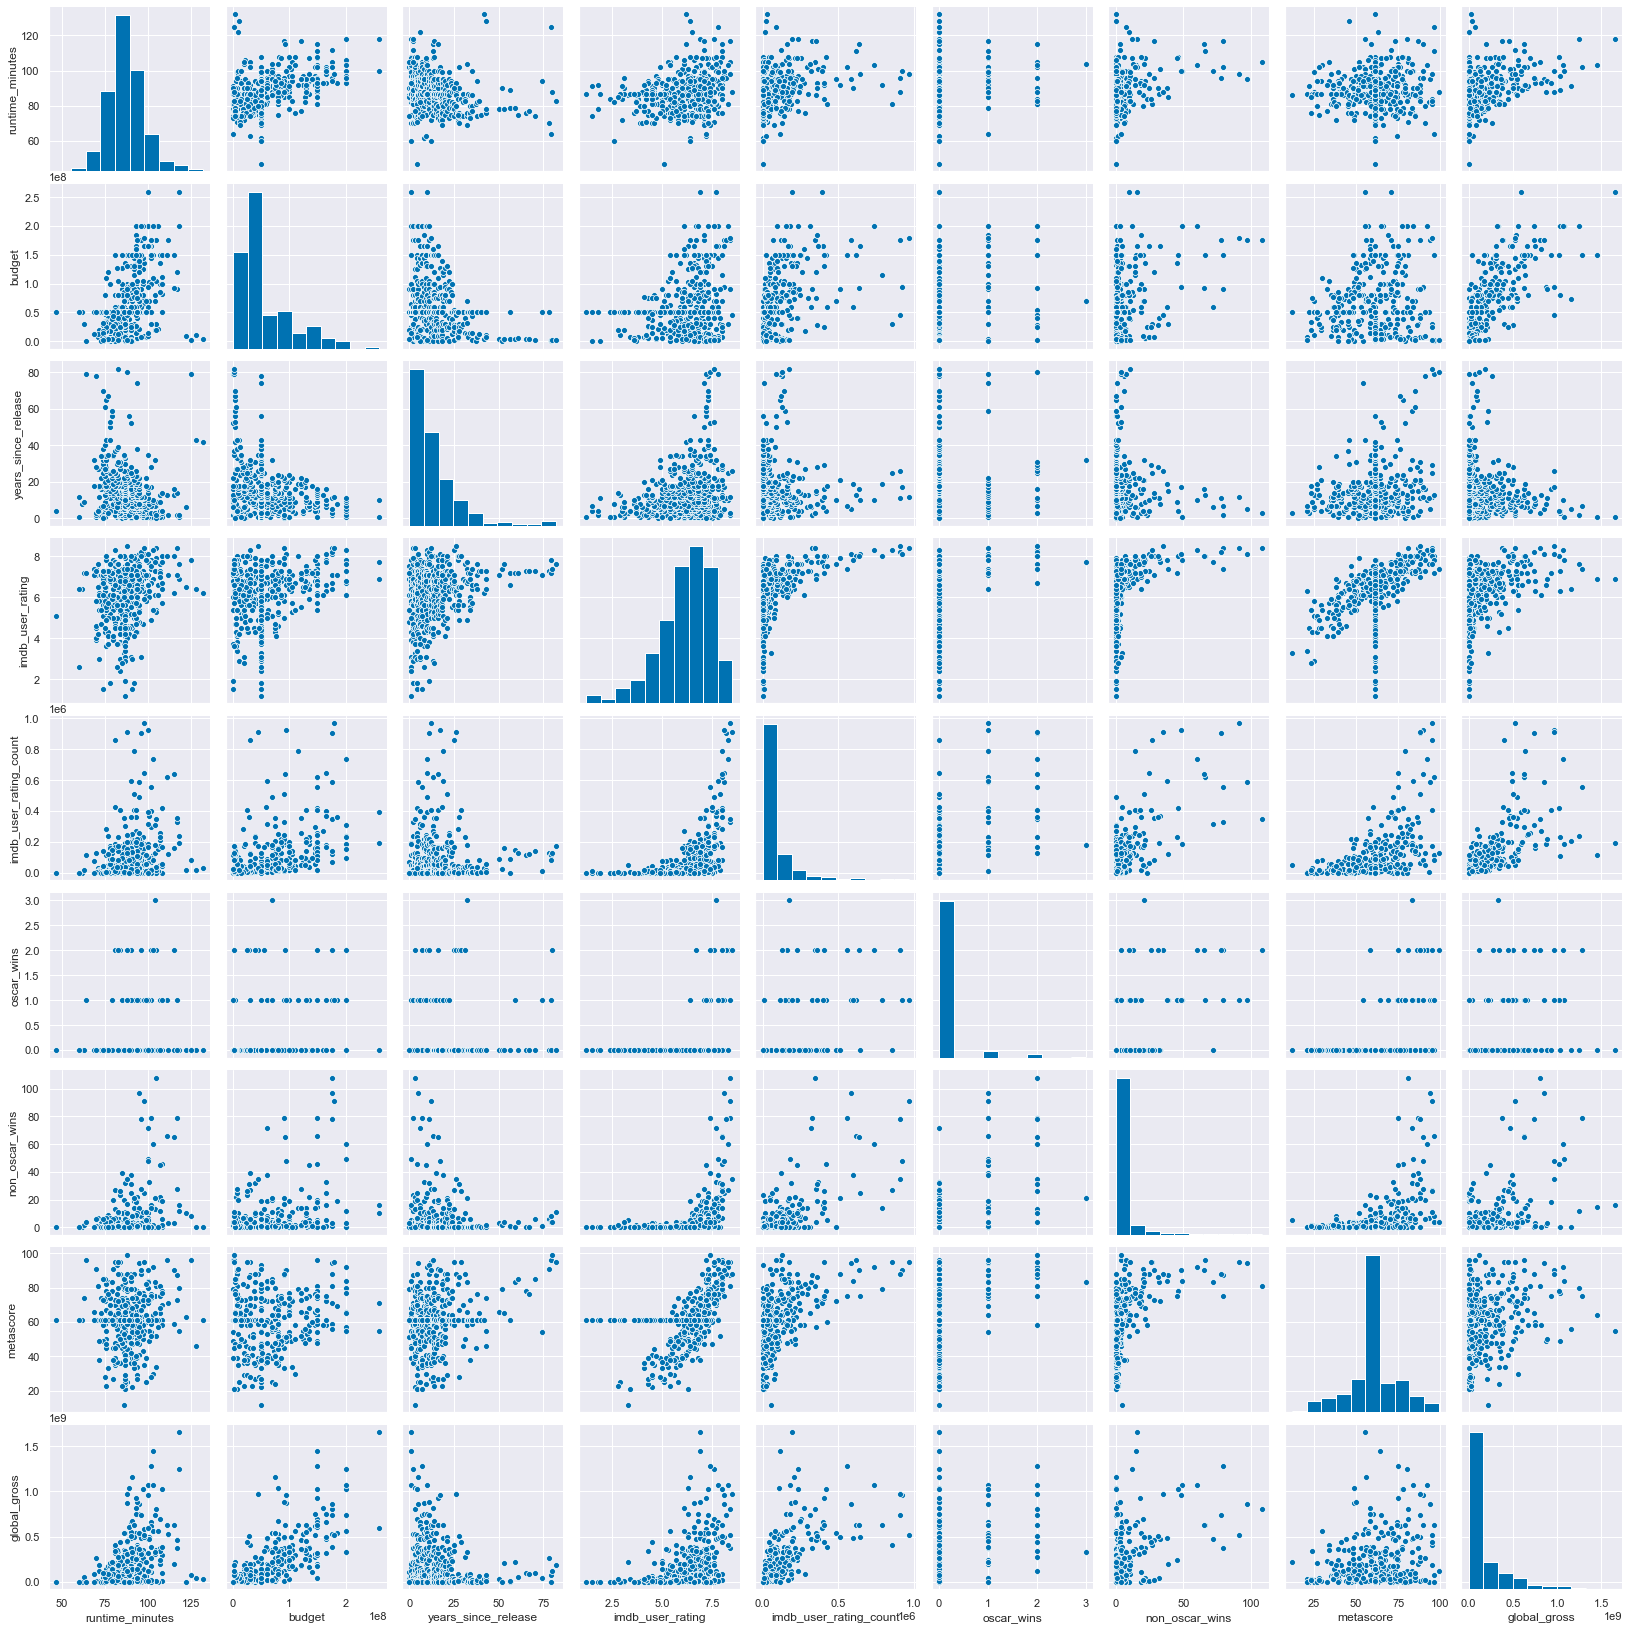

In [12]:
sns.pairplot(usa_df[main_features_target]);

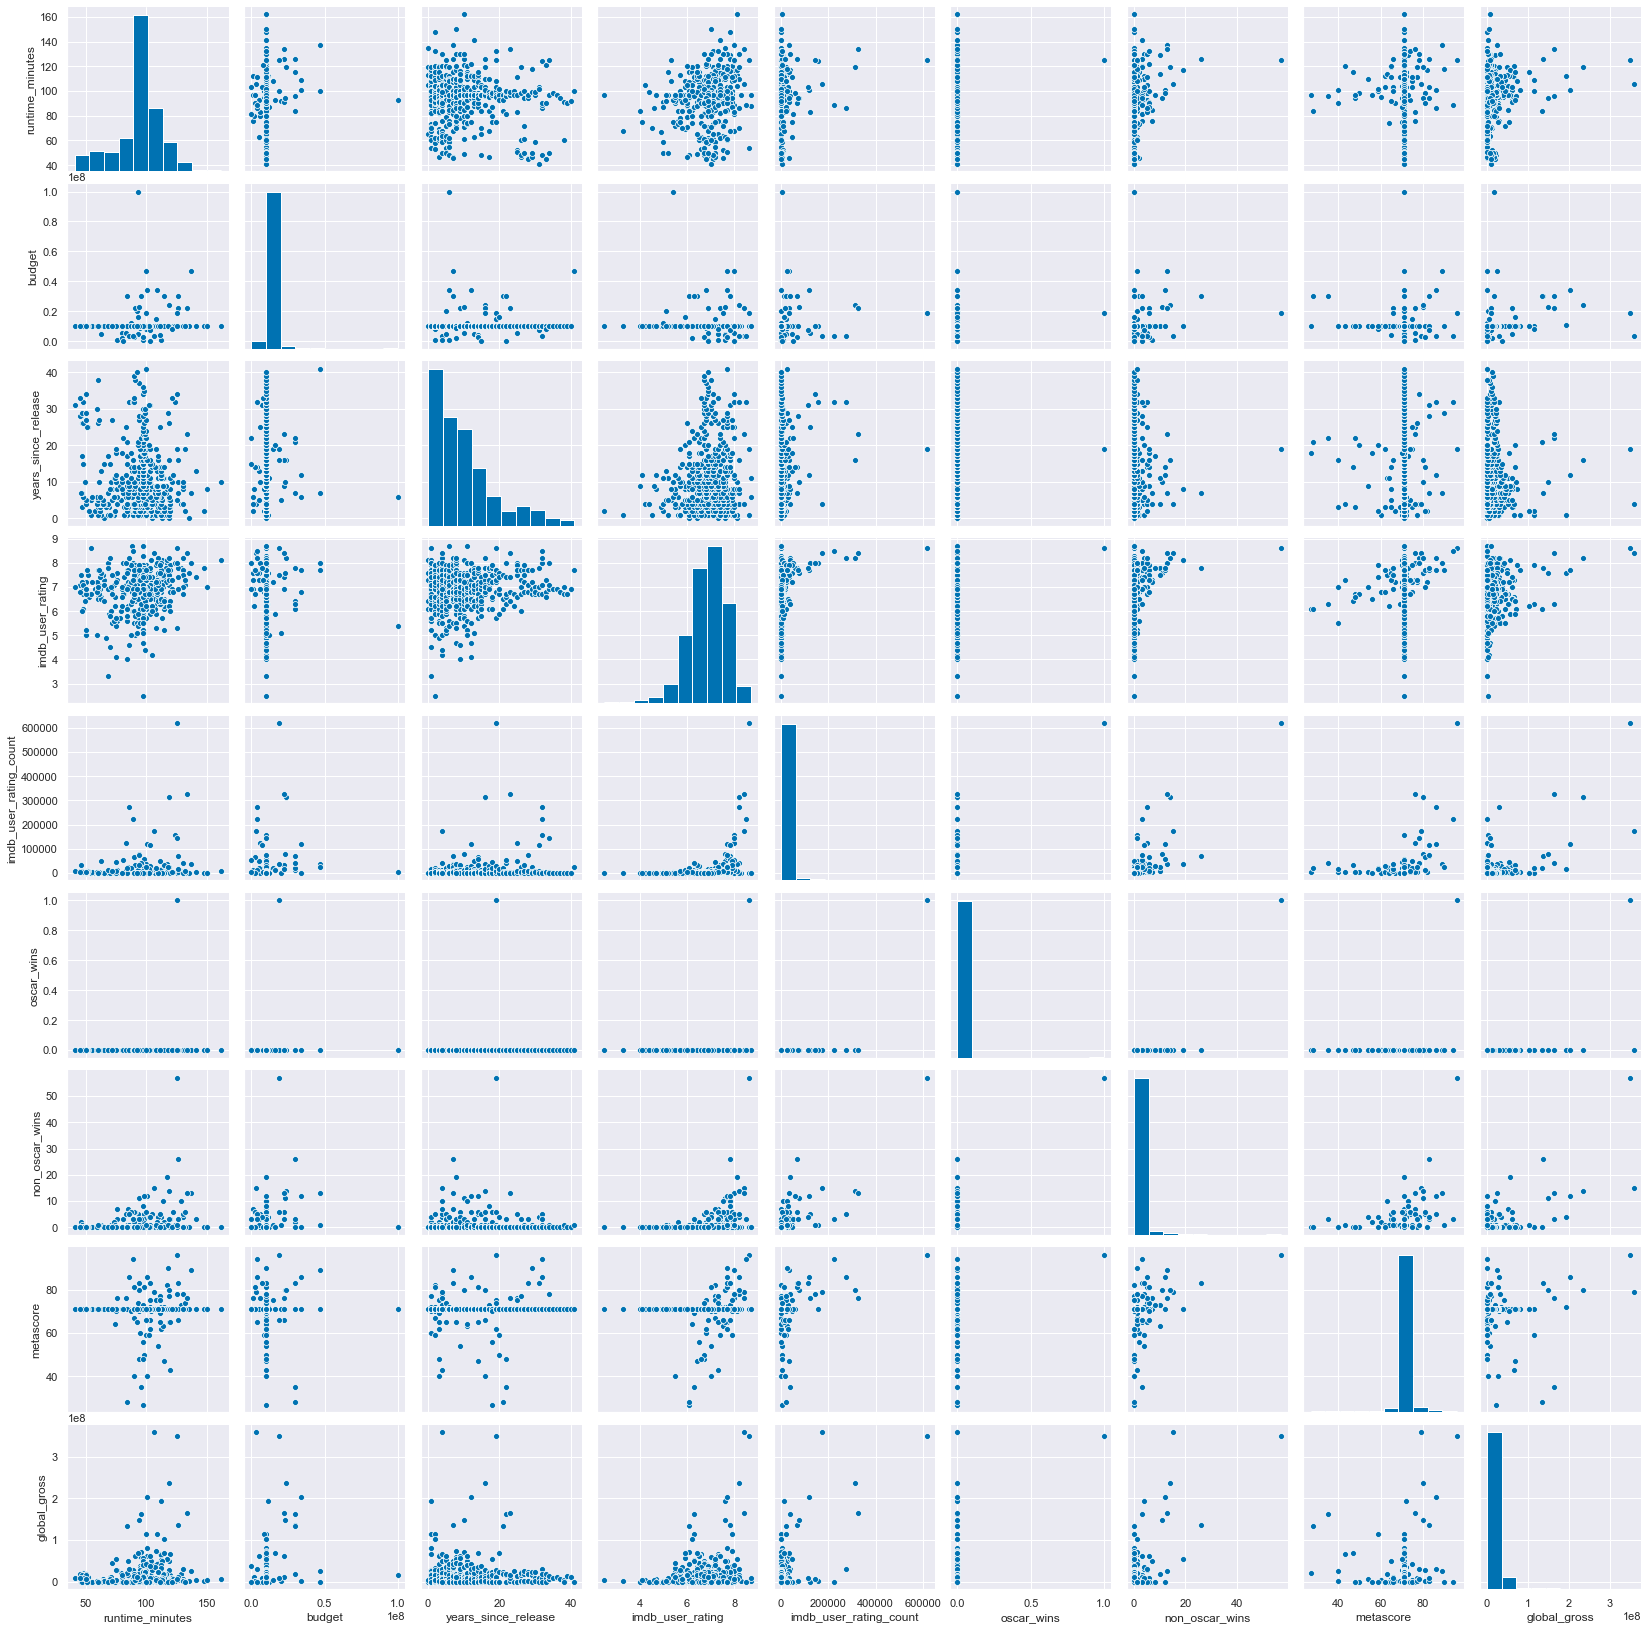

In [14]:
sns.pairplot(japan_df[main_features_target]);

In [22]:
usa_X = usa_df.loc[:, main_features]

usa_y = usa_df[target]

japan_X = japan_df.loc[:, main_features]

japan_y = japan_df[target]

In [26]:
def initial_split(X, y):
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, random_state=4444)
    return X_train_val, X_test, y_train_val, y_test

In [94]:
def split_and_simple_validate(X_train_val, y_train_val):
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=.25, random_state=4444)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    print(f'{"Training R^2 score:": <25}', round(train_score, 3))
    print(f'{"Validation R^2 score:": <25}', round(val_score, 3))
    print('\nFeature coefficients: \n')
    
    for feature, coef in zip(X_train_val.columns, lr_model.coef_[0]): # For some reason, coef are in list of lists
        print(f'{feature: <25} {coef:.2f}') 
        
    return X_train, X_val, y_train, y_val, lr_model

In [42]:
usa_X_train_val, usa_X_test, usa_y_train_val, usa_y_test = initial_split(usa_X, usa_y)

japan_X_train_val, japan_X_test, japan_y_train_val, japan_y_test = initial_split(japan_X, japan_y)

In [37]:
usa_X_train_val.columns

Index(['runtime_minutes', 'budget', 'years_since_release', 'imdb_user_rating',
       'imdb_user_rating_count', 'oscar_wins', 'non_oscar_wins', 'metascore'],
      dtype='object')

In [95]:
usa_X_train, usa_X_val, usa_y_train, usa_y_val, usa_model = split_and_simple_validate(
    usa_X_train_val, usa_y_train_val)

Training R^2 score:       0.703
Validation R^2 score:     0.624

Feature coefficients: 

runtime_minutes           2373579.49
budget                    2.41
years_since_release       -280946.33
imdb_user_rating          14458810.43
imdb_user_rating_count    724.63
oscar_wins                56910264.74
non_oscar_wins            -406787.89
metascore                 -1556755.77


In [96]:
japan_X_train, japan_X_val, japan_y_train, japan_y_val, japan_model = split_and_simple_validate(
    japan_X_train_val, japan_y_train_val)

Training R^2 score:       0.406
Validation R^2 score:     0.583

Feature coefficients: 

runtime_minutes           35317.85
budget                    0.22
years_since_release       -327957.58
imdb_user_rating          -1692866.49
imdb_user_rating_count    326.98
oscar_wins                0.00
non_oscar_wins            4940920.46
metascore                 -240402.37


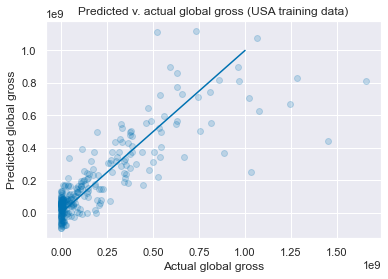

In [110]:
# USA predicted versus actual (training data)
usa_y_train_pred = usa_model.predict(usa_X_train)

plt.scatter(usa_y_train, usa_y_train_pred, alpha=0.2)
plt.xlabel('Actual global gross')
plt.ylabel('Predicted global gross')
plt.title('Predicted v. actual global gross (USA training data)')
plt.plot([0, 1e9], [0, 1e9]);

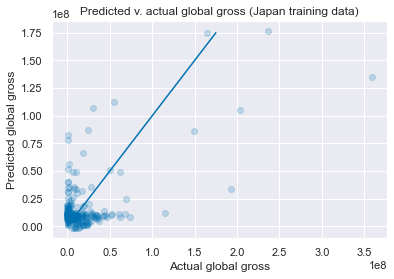

In [114]:
# Japan predicted versus actual (training data)
japan_y_train_pred = japan_model.predict(japan_X_train)

plt.scatter(japan_y_train, japan_y_train_pred, alpha=0.2)
plt.xlabel('Actual global gross')
plt.ylabel('Predicted global gross')
plt.title('Predicted v. actual global gross (Japan training data)')
plt.plot([0, 1.75e8], [0, 1.75e8]);